# Importando as bibliotecas e o dataframe

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use("ggplot")

In [2]:
# Importando a base de dados
df = pd.read_csv('/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv')
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


# Análisando o dataframe

## Verificações iniciais
* Temos dados faltantes?
* Temos dados duplicados?
* O formato de cada coluna está certo?
* Precisaremos tratar algum dado?

In [3]:
# Verificando classificação dos dados e faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [4]:
# Tratando os dados de horário
df['Bedtime'] = pd.to_datetime(df['Bedtime']).dt.strftime('%H:%M')
df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time']).dt.strftime('%H:%M')
# Preview do dataframe
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [5]:
# Verificando se há duplicatas na base
df = df.drop_duplicates()
df.shape

(100, 12)

In [6]:
# Visualizando os padrões da base
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


## EDA
* O sono varia de acordo com a idade?
* Como que é o perfil dos pessoas com insônia?
* O perfil masculino é diferente do feminino?
* Fazer atividade física ajuda a prevenir a insônia?
* ...

### Análisando o perfil

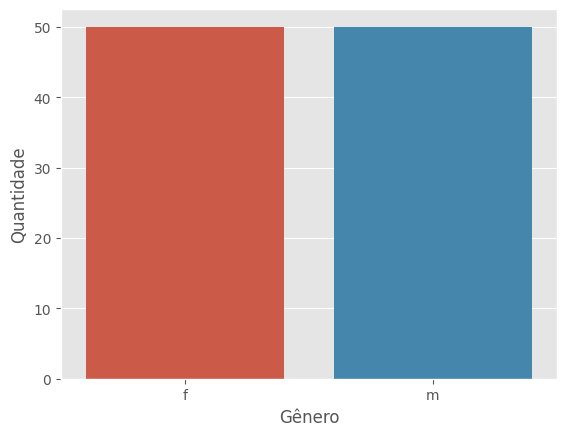

In [7]:
# Verificando o perfil da base
ax = sns.countplot(df, x='Gender');


ax.set_xlabel('Gênero')
ax.set_ylabel('Quantidade')

plt.show()

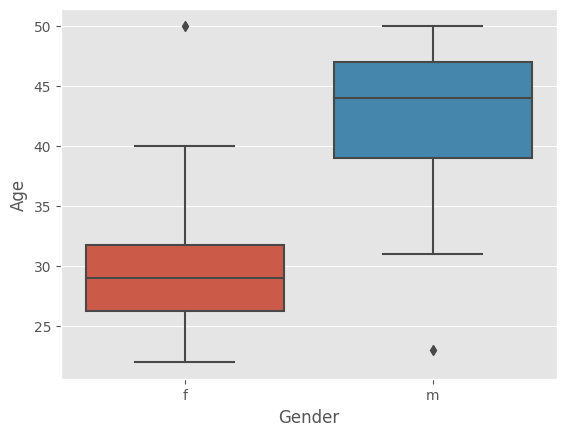

In [8]:
# Analisando o padrão da idade por gênero
ax = sns.boxplot(df, x='Gender', y='Age')

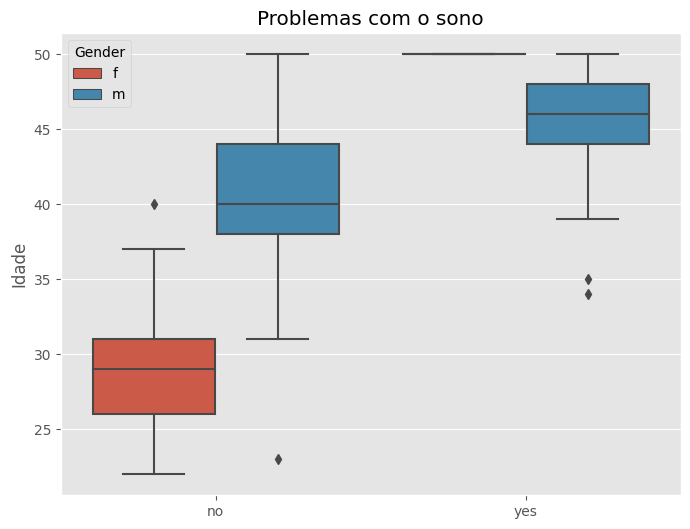

In [9]:
# Análisando o perfil das pessoas com problemas de insônia
# Setando o subplot
ax = plt.figure(figsize=(8, 6))

# Gráfico de insônia
ax = sns.boxplot(df, x='Sleep Disorders', y='Age', hue='Gender')

# Rótulo de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='k')

# Configurando os detalhes do gráfico
ax.set_title('Problemas com o sono')
ax.set_xlabel('')
ax.set_ylabel('Idade')

# Exibir o plot
plt.show()

Text(0, 0.5, 'Nota do sono')

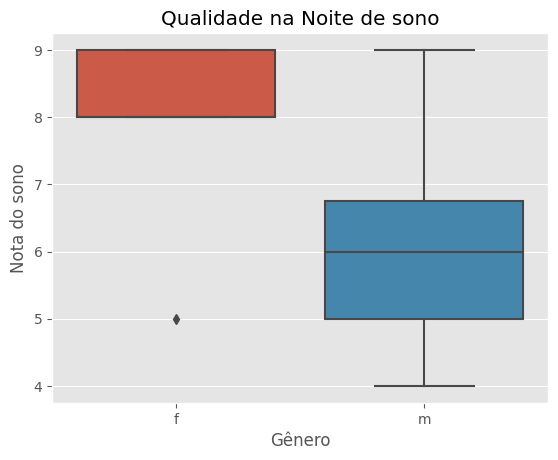

In [10]:
# Analisando a qualidade da noite de sono por gênero
ax = sns.boxplot(df, x='Gender', y='Sleep Quality')

# Configurando os detalhes do gráfico
ax.set_title('Qualidade na Noite de sono')
ax.set_xlabel('Gênero')
ax.set_ylabel('Nota do sono')

## Verificando os detalhes da noite de sono

### Nota do sono

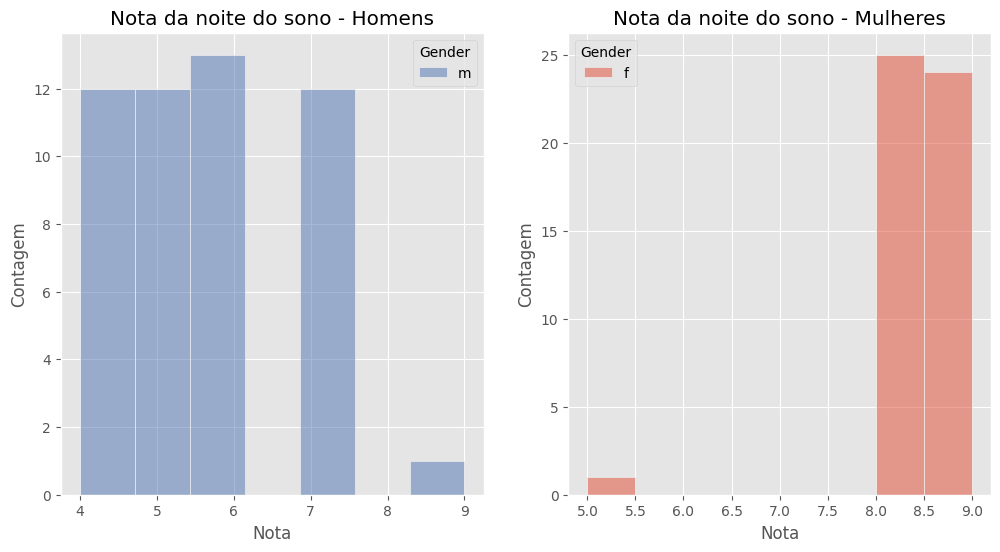

In [11]:
# Análisando o horário de acordar por gênero
# Setando o subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Ordenando
hora_de_acordar = df.sort_values('Wake-up Time', ascending=True)

# Filtrando os dataframes
masculino = hora_de_acordar['Gender'] == 'm'
feminino = hora_de_acordar['Gender'] == 'f'

# Primeiro Subplot - Masculino
sns.histplot(hora_de_acordar[masculino], x='Sleep Quality', hue='Gender', palette='deep', ax=axs[0])

# Configurando o primeiro plot
axs[0].set_title('Nota da noite do sono - Homens')
axs[0].set_xlabel('Nota')
axs[0].set_ylabel('Contagem')

# Segundo Subplot - Feminino
sns.histplot(hora_de_acordar[feminino], x='Sleep Quality', hue='Gender', ax=axs[1])

# Configurando o segundo plot
axs[1].set_title('Nota da noite do sono - Mulheres')
axs[1].set_xlabel('Nota')
axs[1].set_ylabel('Contagem')

# Rótulo de dados
# for ax in axs:
#     for container in ax.containers:
#         ax.bar_label(container, label_type='edge', color='k')

# Exibir os subplots
plt.show()

### Horário de dormir

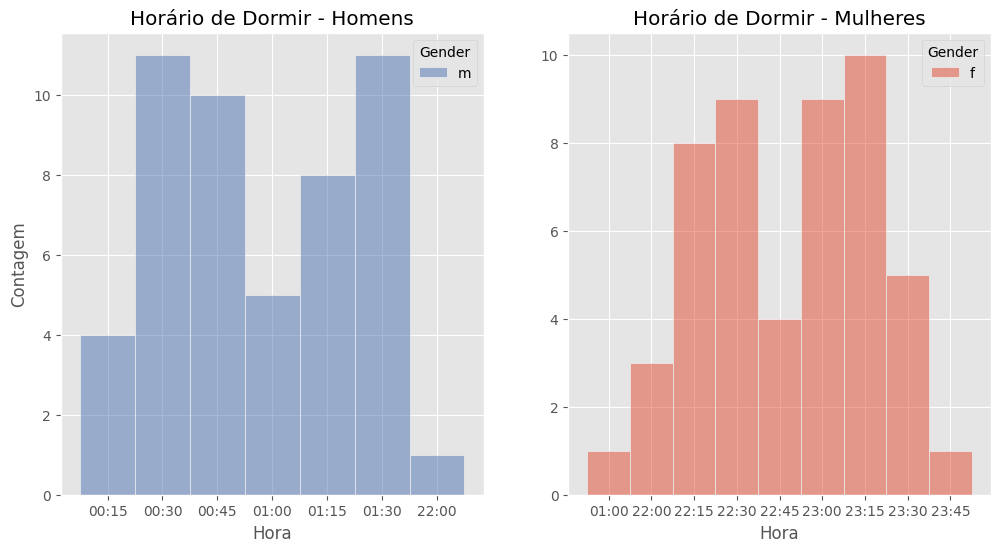

In [12]:
# Análisando o horário de dormir por gênero
# Setando o subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Ordenando
horario_de_dormir = df.sort_values('Bedtime', ascending=True)

# Filtrando os dataframes
masculino = horario_de_dormir['Gender'] == 'm'
feminino = horario_de_dormir['Gender'] == 'f'

# Primeiro Subplot - Masculino
sns.histplot(horario_de_dormir[masculino], x='Bedtime', hue='Gender', palette='deep', ax=axs[0])

axs[0].set_title('Horário de Dormir - Homens')
axs[0].set_xlabel('Hora')
axs[0].set_ylabel('Contagem')

# Segundo Subplot - Feminino
sns.histplot(horario_de_dormir[feminino], x='Bedtime', hue='Gender', ax=axs[1])

axs[1].set_title('Horário de Dormir - Mulheres')
axs[1].set_xlabel('Hora')
axs[1].set_ylabel('')

# Rótulo de dados
# for ax in axs:
#     for container in ax.containers:
#         ax.bar_label(container, label_type='edge', color='k')

# Exibir os subplots
plt.show()

### Horário de acordar

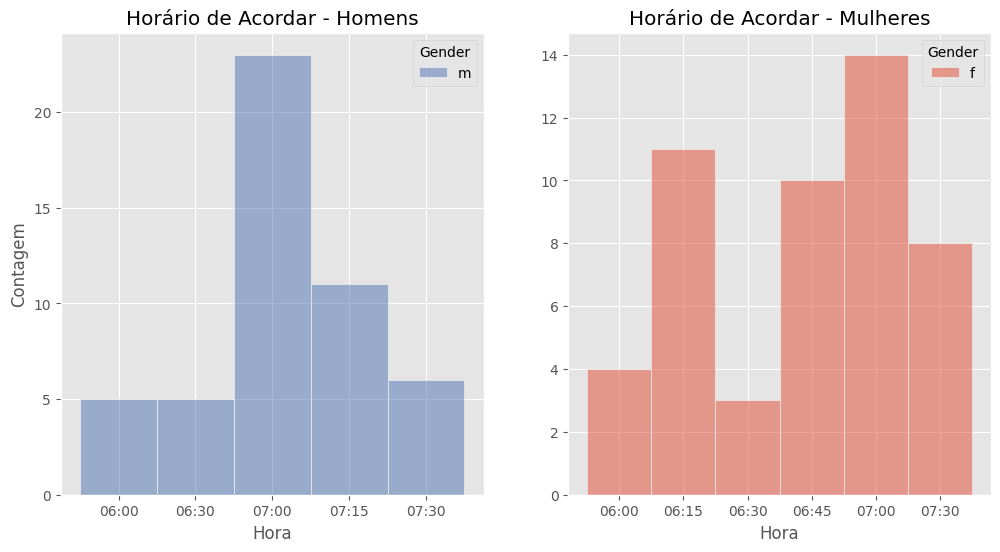

In [13]:
# Análisando o horário de acordar por gênero
# Setando o subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Ordenando
hora_de_acordar = df.sort_values('Wake-up Time', ascending=True)

# Filtrando os dataframes
masculino = hora_de_acordar['Gender'] == 'm'
feminino = hora_de_acordar['Gender'] == 'f'

# Primeiro Subplot - Masculino
sns.histplot(hora_de_acordar[masculino], x='Wake-up Time', hue='Gender', palette='deep', ax=axs[0])

axs[0].set_title('Horário de Acordar - Homens')
axs[0].set_xlabel('Hora')
axs[0].set_ylabel('Contagem')

# Segundo Subplot - Feminino
sns.histplot(hora_de_acordar[feminino], x='Wake-up Time', hue='Gender', ax=axs[1])

axs[1].set_title('Horário de Acordar - Mulheres')
axs[1].set_xlabel('Hora')
axs[1].set_ylabel('')

# Exibir os subplots
plt.show()

## Perfil dos afetados pela insônia

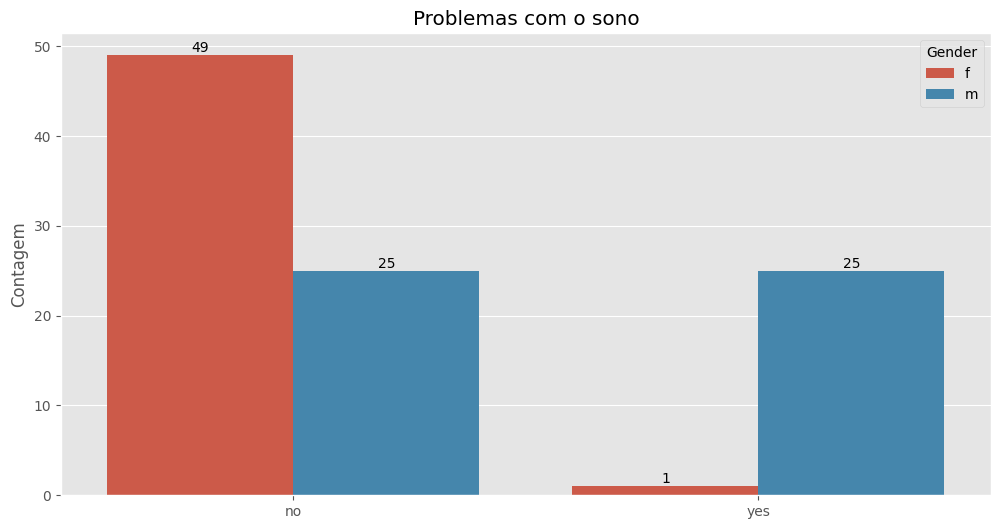

In [14]:
# Análisando o perfil das pessoas com problemas de insônia
# Setando o subplot
ax = plt.figure(figsize=(12, 6))

# Gráfico de insônia
ax = sns.countplot(df, x='Sleep Disorders', hue='Gender')

# Rótulo de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='k')

# Configurando os detalhes do gráfico
ax.set_title('Problemas com o sono')
ax.set_xlabel('')
ax.set_ylabel('Contagem')

# Exibir o plot
plt.show()

## Análisando os hábitos
* Filtramos apenas o perfil masculino visando que os problemas com o sono afetam em grande maioria os homens

In [15]:
# Filtrando o dataframe
masculino = df['Gender'] == 'm'
df = df[masculino] 

### Atividade física

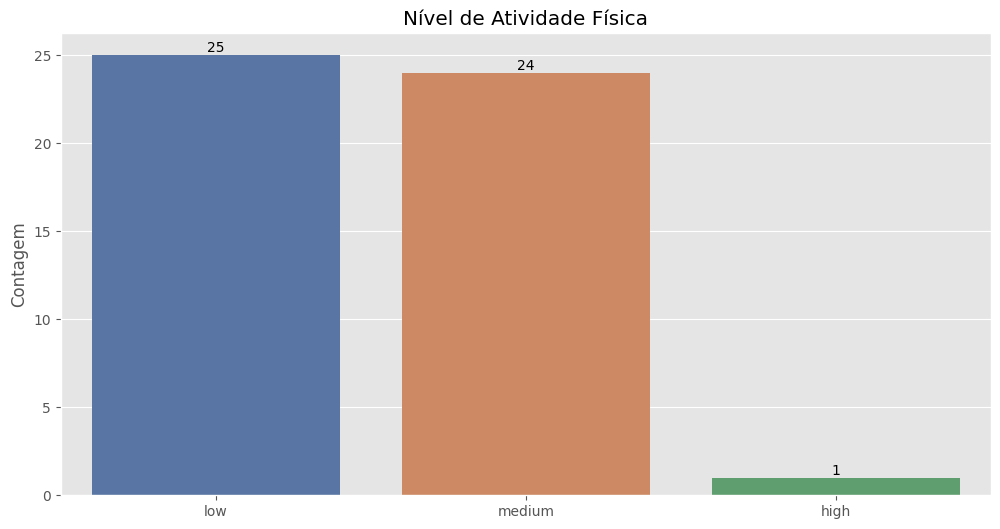

In [16]:
# Análisando o nível de atividade física
# Setando o subplot
ax = plt.figure(figsize=(12, 6))

# Gráfico de insônia
ax = sns.countplot(df, x='Physical Activity Level', palette='deep')

# Rótulo de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='k')

# Configurando os detalhes do gráfico
ax.set_title('Nível de Atividade Física')
ax.set_xlabel('')
ax.set_ylabel('Contagem')

# Exibir o plot
plt.show()

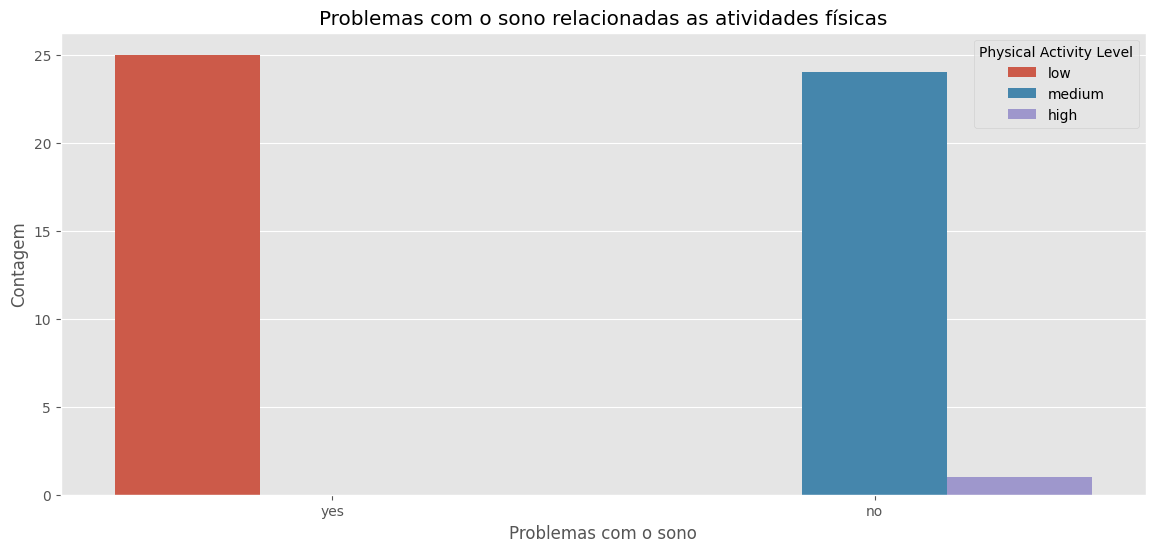

In [17]:
# Análisando a influência da falta de atividade com os problemas de insônia
# Setando o subplot
ax = plt.subplots(figsize=(14, 6))

# Primeiro Subplot - Masculino
ax = sns.countplot(df, x='Sleep Disorders', hue='Physical Activity Level')

ax.set_title('Problemas com o sono relacionadas as atividades físicas')
ax.set_xlabel('Problemas com o sono')
ax.set_ylabel('Contagem')

# Exibir os subplots
plt.show()

### Passos por dia

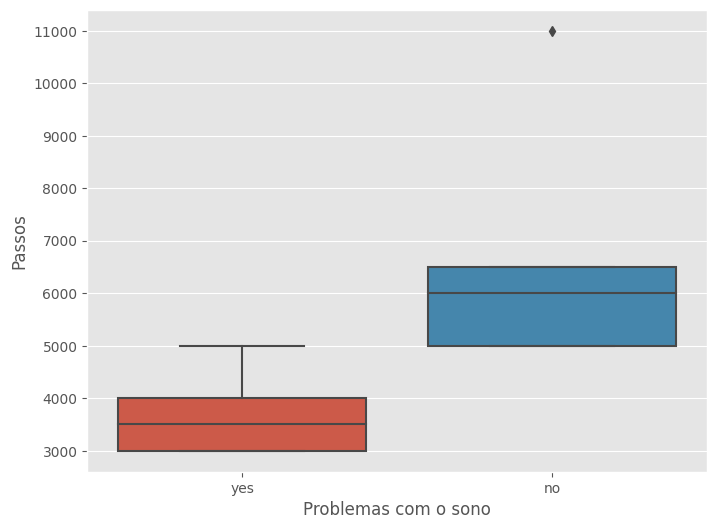

In [18]:
# Análisando se as pessoas com insônia tende a andar menos
# Setando o subplot
ax = plt.subplots(figsize=(8, 6))

# Primeiro Subplot - Masculino
ax = sns.boxplot(df, x='Sleep Disorders', y='Daily Steps')

ax.set_title('')
ax.set_xlabel('Problemas com o sono')
ax.set_ylabel('Passos')

# Exibir os subplots
plt.show()

### Calorias queimadas por dia

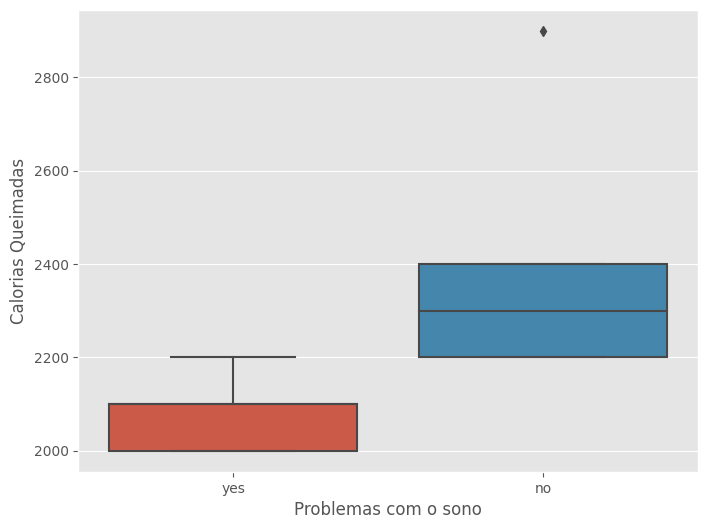

In [19]:
# Análisando se quanto mais calorias gastas por dia ajuda na noite de sono
# Setando o subplot
ax = plt.subplots(figsize=(8, 6))

# Primeiro Subplot - Masculino
ax = sns.boxplot(df, x='Sleep Disorders', y='Calories Burned')

ax.set_title('')
ax.set_xlabel('Problemas com o sono')
ax.set_ylabel('Calorias Queimadas')

# Exibir os subplots
plt.show()

### Hábitos alimentares

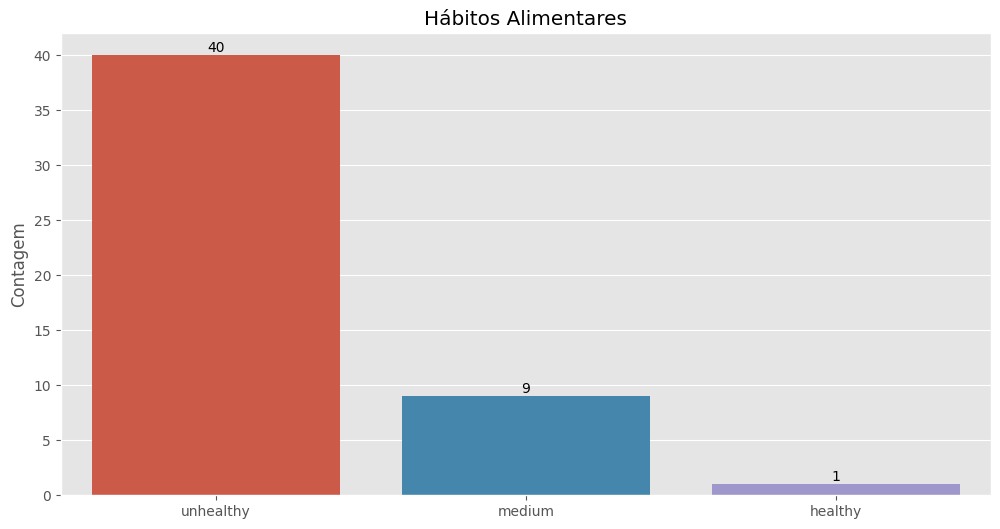

In [20]:
# Análisando os hábitos alimentares por gênero
# Setando o subplot
ax = plt.figure(figsize=(12, 6))

# Gráfico de insônia
ax = sns.countplot(df, x='Dietary Habits')

# Rótulo de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='k')

# Configurando os detalhes do gráfico
ax.set_title('Hábitos Alimentares')
ax.set_xlabel('')
ax.set_ylabel('Contagem')

# Exibir o plot
plt.show()

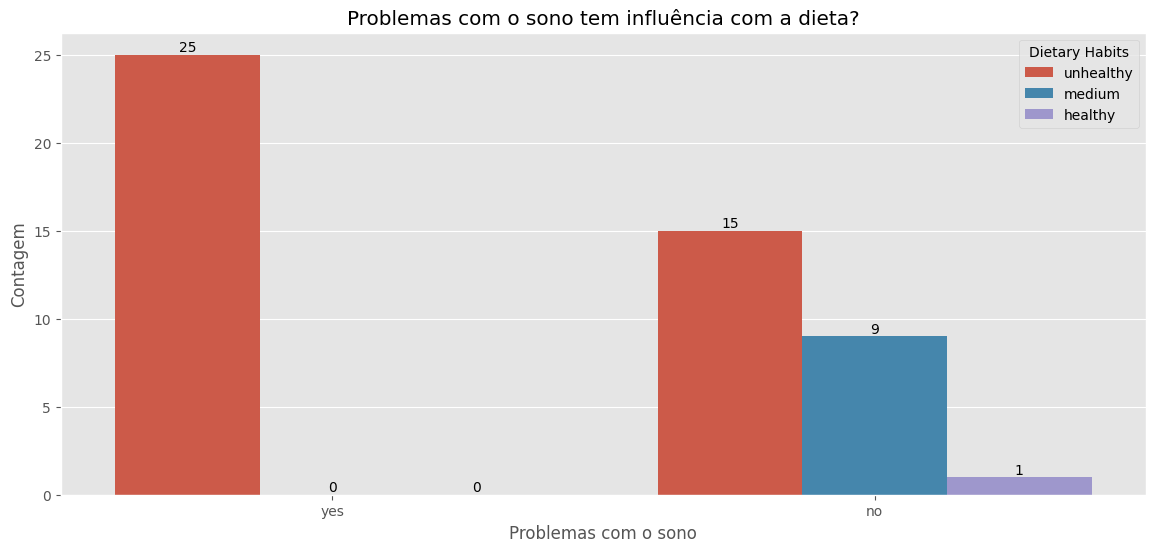

In [21]:
# Análisando a influência do hábito alimentar com o problema com o sono
# Setando o subplot
ax = plt.subplots(figsize=(14, 6))

# Primeiro Subplot - Masculino
ax = sns.countplot(df, x='Sleep Disorders', hue='Dietary Habits')

# Rótulo de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='k')

# Configurando os detalhes do gráfico
ax.set_title('Problemas com o sono tem influência com a dieta?')
ax.set_xlabel('Problemas com o sono')
ax.set_ylabel('Contagem')

# Exibir os subplots
plt.show()

### Uso de medicamentos

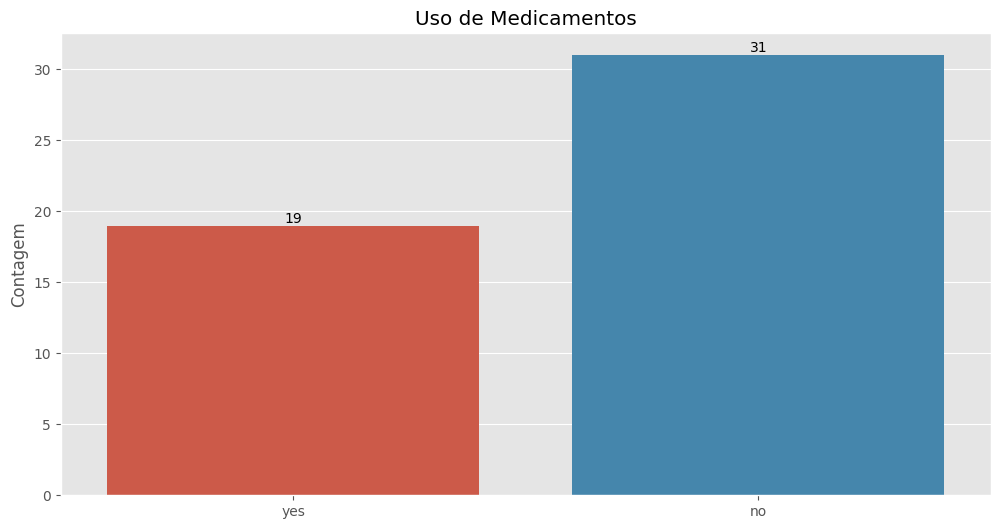

In [22]:
# Análisando o uso de medicamentos por gênero
# Setando o subplot
ax = plt.figure(figsize=(12, 6))

# Gráfico de insônia
ax = sns.countplot(df, x='Medication Usage')

# Rótulo de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='k')

# Configurando os detalhes do gráfico
ax.set_title('Uso de Medicamentos')
ax.set_xlabel('')
ax.set_ylabel('Contagem')

# Exibir o plot
plt.show()

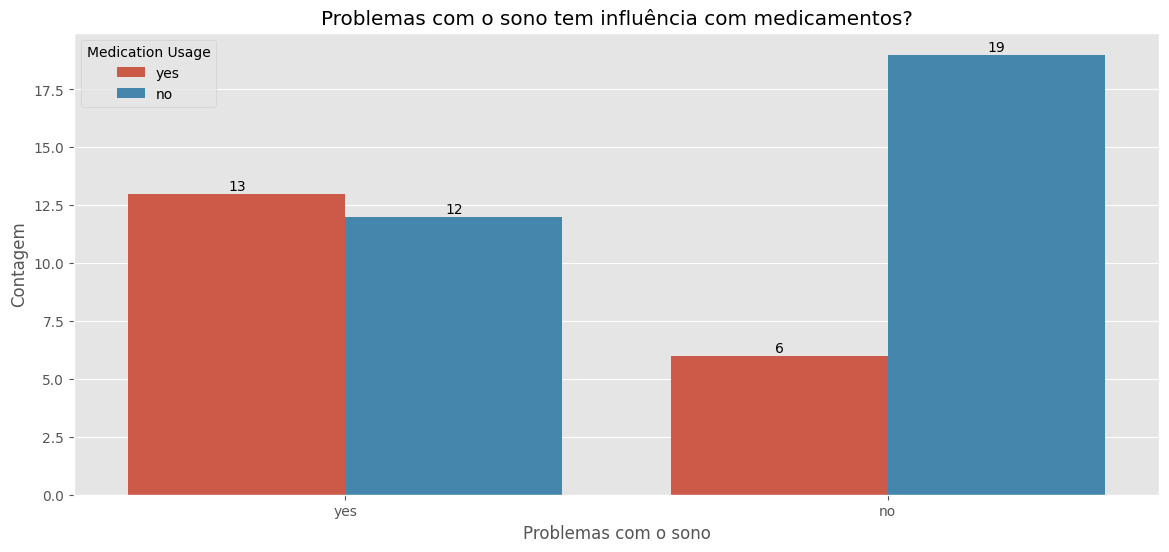

In [23]:
# Análisando a influência do uso de remédios com os problemas de sono
# Setando o subplot
ax = plt.subplots(figsize=(14, 6))

# Primeiro Subplot - Masculino
ax = sns.countplot(df, x='Sleep Disorders', hue='Medication Usage')

# Rótulo de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='k')

# Configurando os detalhes do gráfico
ax.set_title('Problemas com o sono tem influência com medicamentos?')
ax.set_xlabel('Problemas com o sono')
ax.set_ylabel('Contagem')

# Exibir os subplots
plt.show()